#Food and nonfood picture viewing task - an fMRI comparison of neural activity

---
Jan Bendyk, Jakub Hapunik, Katarzyna Kotyńska

---



Functional magnetic resonance imaging (fMRI) is a non-invasive neuroimaging technique that allows researchers to investigate brain activity in response to various stimuli. In recent years, there has been a growing interest in understanding how the brain responds to food stimuli, given the global obesity epidemic and the potential role of the brain in regulating food intake.
One way to investigate this question is by comparing brain activity in response to food and non-food stimuli. Smeets and colleagues (2013) run a study that has used fMRI to compare brain activity during the passive presentation of food images with non-food images.


Given that food is a primary reward, it is widely believed that individuals are naturally inclined to respond to food-related stimuli, especially those associated with high caloric content, particularly when they are experiencing hunger (Pinel et al, 2000). However, Counteractive Control Theory proposes that when individuals face tempting food cues that may lead to indulgence, they also activate a self-control mechanism that supersedes the urge to indulge (Trope & Fischbach, 2000).


In our study, we aim to investigate the neural basis of food perception by comparing brain activity during the presentation of food and non-food images based on Smeets and colleagues’ (2018) fMRI dataset. We hypothesize that food images will elicit stronger activation in brain regions involved in reward processing, such as the striatum (Beaver et al, 2006) and the orbitofrontal cortex (Wang et al, 2004), compared to non-food images. For self-control, our a priori specified regions of interest that we predict to be strongly activated are based on other studies of self-regulation in the brain, and include the lateral prefrontal cortex and the anterior cingulate cortex (Heatherton & Wagner, 2011).
By investigating the neural mechanisms underlying food perception, this study may provide valuable insights into the neural mechanisms underlying food perception, eating behavior and clues for developing interventions to promote healthy eating behavior.

We  selected 10 out of 30 participants, however we only managed to get final results of 7. All are healthy females with a
mean age of 22.1 years (SD = 2.0) within an 18-30 years old range and a mean body mass index [BMI] of 20.7 kg/m2, (SD = 2.0) with a range of 18–25 kg/m2 BMI.
Participants were requested to refrain from eating and drinking (except water) for atleast 3 h prior to the scanning session.
During scanning, subjects alternately viewed 24 s blocks of palatable food
images (8 blocks) and non-food images (i.e., office utensils; 8 blocks), interspersed with 8–16 s rest blocks showing a crosshair (12 s on average).

Our short step-by-step for completing this task included:

1. Downloading all necessary libraries and our data.
2. De-noising.
3. Slicing time series into pieces for each condition (food/nonfood).
4. Calculating functional connectivity.
5. Getting the measures and graphs.
6. Statistical test between conditions (paired t-test).
7. Analysing our pre-selected parts of brain to check the hypotheses.


For more detailed descriptions of each step, look further into the comments in the code.



Unfortunately, most likely due to a low number of analysed cases, we cannot assess our hypotheses as the results are statistically insignificant.



---



## Bibliography
*Beaver, J. D., Lawrence, A. D., Van Ditzhuijzen, J., Davis, M. H., Woods, A., & Calder, A. J. (2006). Individual differences in reward drive predict neural responses to images of food. Journal of Neuroscience, 26(19), 5160-5166.*

*Heatherton, T. F., & Wagner, D. D. (2011). Cognitive neuroscience of self-regulation failure. Trends in cognitive sciences, 15(3), 132-139.*

*Pinel, J. P., Assanand, S., & Lehman, D. R. (2000). Hunger, eating, and ill health. American Psychologist, 55(10), 1105.*

*Smeets, P. A. M., Kroese, F. M., Evers, C., & de Ridder, D. T. D. (2013). Allured or alarmed: Counteractive control responses to food temptations in the brain. Behavioural Brain Research, 248, 41–45.*

*Smeets, P. A. M., Kroese, F. M., Evers, C., & de Ridder, D. T. D. (2018). Block design food and nonfood picture viewing task. OpenNeuro. [Dataset]*

*Trope, Y., & Fishbach, A. (2000). Counteractive self-control in overcoming temptation. Journal of personality and social psychology, 79(4), 493.*

*Wang, G. J., Volkow, N. D., Telang, F., Jayne, M., Ma, J., Rao, M., ...Fowler, J. S. (2004). Exposure to appetitive food stimuli markedly activates the human brain. Neuroimage, 21(4), 1790-1797.*

---

# Installing dependecies - reset the runtime after this (ctrl + M)!

In [ ]:
!pip install nilearn
!pip install -U matplotlib
!apt install datalad
!pip install bctpy

# Downloading and organizing our data


In [ ]:
#cloning the dataset/repository - IT DOES NOT DOWNLOAD THE FILES
!datalad clone https://github.com/OpenNeuroDerivatives/ds000157-fmriprep.git

The data that's downloaded below is much smaller than we first expected - the whole dataset (for 10 subjects) would have about 30GB - but there are multiple different version of e.g. functional scans, the ones that we can use are only 150 MB per subject.

In [ ]:
#changing directory to our dataset
%cd /content/ds000157-fmriprep/

#not neccessary, it removes unwanted imaging files from the repo
!for i in `seq 11 30`; do rm -r sub-${i}*; done

#removing subjects 5, 6, 7 - turns out their data is broken
!for i in 05 06 07; do rm -r /content/ds000157-fmriprep/sub-${i}*; done

#making directory for only files we'll need
!mkdir bold_images

#moving the bold timeseries images (it's the only data we'll need for NiLearn) to separate folder for conveniance
!mv /content/ds000157-fmriprep/sub-*/func/sub-*_task-passiveimageviewing_desc-preproc_bold.nii.gz ./bold_images/
!rename 's/task-passiveimageviewing_desc-preproc_//g' ./bold_images/*

#moving confounds and downloading the actual files
!mv /content/ds000157-fmriprep/sub-*/func/sub-*_task-passiveimageviewing_desc-confounds_timeseries.tsv /content/ds000157-fmriprep/bold_images/
!rename 's/task-passiveimageviewing_desc-confounds_timeseries/confounds/g' /content/ds000157-fmriprep/bold_images/*

#moving mask images
!mv /content/ds000157-fmriprep/sub-*/func/sub-*_task-passiveimageviewing_desc-brain_mask.nii.gz /content/ds000157-fmriprep/bold_images/
!rename 's/task-passiveimageviewing_desc-brain_//g' /content/ds000157-fmriprep/bold_images/*

/content/ds000157-fmriprep


In [ ]:
#unlocking our data for download, if it doesn't work just do !datalad unlock
!datalad unlock /content/ds000157-fmriprep/bold_images/ #it takes a while
!datalad save

In [ ]:
#downloading the actual data (bold timeseries, confounds timeseries and brain masks)

#!datalad get /content/ds000157-fmriprep/bold_images/sub-*_confounds.tsv

!datalad get /content/ds000157-fmriprep/bold_images/sub-*_bold.nii.gz

!datalad get /content/ds000157-fmriprep/bold_images/sub-*_confounds.tsv

!datalad get /content/ds000157-fmriprep/bold_images/sub-*_mask.nii.gz

In [ ]:
%cd ds000157-fmriprep/

/content/ds000157-fmriprep


In [ ]:
!datalad get /content/ds000157-fmriprep/sub-10.html

It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
get(ok): sub-10.html (file) [from openneuro-derivatives...]


In [ ]:
#downloading events file - they are all the same for every subject
%cd bold_images/
!wget https://openneuro.org/crn/datasets/ds000157/snapshots/00001/files/sub-01:func:sub-01_task-passiveimageviewing_events.tsv
!mv /content/ds000157-fmriprep/bold_images/sub-01:func:sub-01_task-passiveimageviewing_events.tsv events.tsv

/content/ds000157-fmriprep/bold_images
--2023-02-28 10:41:24--  https://openneuro.org/crn/datasets/ds000157/snapshots/00001/files/sub-01:func:sub-01_task-passiveimageviewing_events.tsv
Resolving openneuro.org (openneuro.org)... 34.107.158.10
Connecting to openneuro.org (openneuro.org)|34.107.158.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/tab-separated-values]
Saving to: ‘sub-01:func:sub-01_task-passiveimageviewing_events.tsv’

sub-01:func:sub-01_     [ <=>                ]     333  --.-KB/s    in 0s      

2023-02-28 10:41:25 (35.3 MB/s) - ‘sub-01:func:sub-01_task-passiveimageviewing_events.tsv’ saved [333]



# Analysis

In [ ]:
from nilearn import datasets
from nilearn import maskers
from nilearn import image
from nilearn import input_data
from nilearn import plotting
from nilearn.connectome import ConnectivityMeasure
from nilearn.maskers import NiftiLabelsMasker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

In [ ]:
#getting the list of files: images, confounds and masks for each subject
!ls /content/ds000157-fmriprep/bold_images/sub*_bold.nii.gz > /content/ds000157-fmriprep/sub_paths
!ls /content/ds000157-fmriprep/bold_images/sub*.tsv > /content/ds000157-fmriprep/conf_paths
!ls /content/ds000157-fmriprep/bold_images/sub*_mask.nii.gz > /content/ds000157-fmriprep/mask_paths

In [ ]:
#loading the paths of files
sub_paths = np.loadtxt("/content/ds000157-fmriprep/sub_paths", dtype=str)
conf_paths = np.loadtxt("/content/ds000157-fmriprep/conf_paths", dtype=str)
mask_paths = np.loadtxt("/content/ds000157-fmriprep/mask_paths", dtype=str)

## Denoising

Denoising is essential for improving the accuracy and reliability of  the interpretation of brain activity.

In [ ]:
high_pass= 0.009
low_pass = 0.08
tr = 1.6


fmri_clean = []

for i in range(len(sub_paths)):
  fmri_image = image.load_img(sub_paths[i])
  print(fmri_image.shape)

  mask = mask_paths[i]

  confounds_df = pd.read_csv(conf_paths[i], sep ="\t")
  #confounds = np.nan_to_num(confounds_df)
  confounds = confounds_df.to_numpy()
  confounds = np.nan_to_num(confounds)  #replacing missing data

  # Clean fMRI data using image.clean_img
  fmri_clean.append(image.clean_img(fmri_image, confounds=confounds, low_pass=low_pass, high_pass=high_pass, t_r=tr, standardize=True, mask_img=mask))


NameError: ignored

# Exploring the data...

Denoised bold images are stored in **fmri_clean** list.

In [ ]:
#loading one subject data for testing
data_numpy = image.get_data(fmri_clean[1]) #this loads numpy array that's part of .nii.gz file
data_nifti = image.load_img(fmri_clean[1]) #this loads a whole image/nifti file that NiLearn can work on



In [ ]:
print(type(data_numpy), "\n", type(data_nifti))

<class 'numpy.ndarray'> 
 <class 'nibabel.nifti1.Nifti1Image'>


In [ ]:
data_nifti.shape

(64, 64, 30, 375)

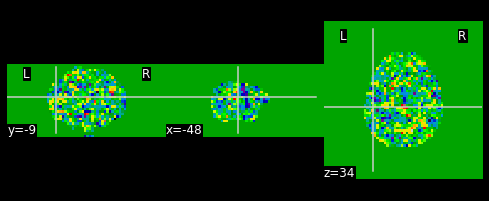

In [ ]:
fmri_1 = image.index_img(data_nifti, 40)
plotting.plot_epi(fmri_1)

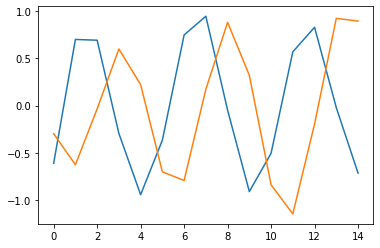

In [ ]:
# select timeseries of two selected voxels
voxel_1 = data_numpy[32, 32, 15, 0:15]
voxel_2 = data_numpy[-32, -36, 15, 25:40]

# plot timeseries of two selected voxels
plt.plot(voxel_1)
plt.plot(voxel_2)

# Atlas

We chose the Harvard-Oxford atlas that is covering 48 cortical and 21 subcortical structural areas and created based on T1-weighted images of 21 healthy male and 16 healthy female subjects (ages 18-50).

In [ ]:
# Get atlas data (Harvard-Oxford)
atlas = datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr0-2mm")

# Save maps and labels under a new variable
maps = atlas.maps
labels = atlas.labels

# Initiate NiftiLabelMasker object
masker = NiftiLabelsMasker(atlas.maps)

# Extract timeseries from fmri images using .fit_transform
time_series = masker.fit_transform(fmri_clean[6])

# Print shape of the data
print(type(time_series))

<class 'numpy.ndarray'>


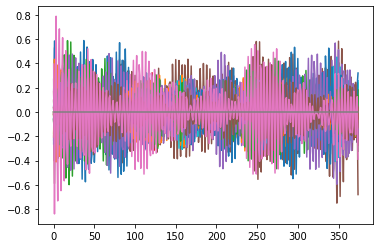

In [ ]:
_ = plt.plot(time_series)

(48, 48)


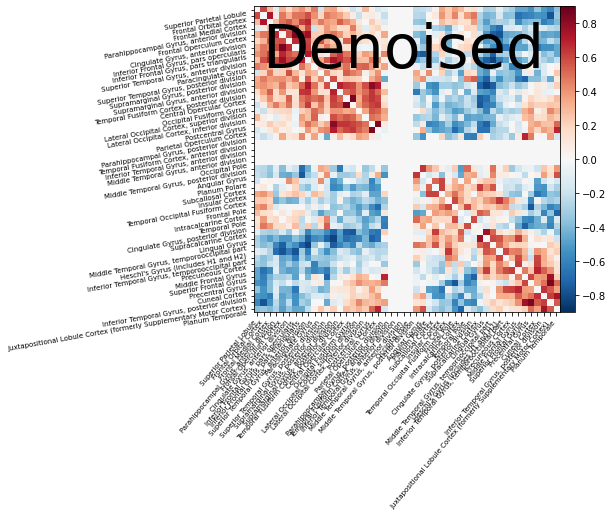

In [ ]:
# Initiate ConnectivityMeasure object with correlation as a measure
correlation_measure = ConnectivityMeasure(kind="correlation")

# Calculate correlation between timeseries
correlation_matrix = correlation_measure.fit_transform([time_series])[0]
print(correlation_matrix.shape)
# Plot the correlation matrix

# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)

# The labels we have start with the background (0), hence we skip the
# first label -> labels=labels[1:]


# matrices are ordered for block-like representation with plotting.plot_matrix
plotting.plot_matrix(correlation_matrix, labels=labels[1:],
                   vmax=0.9, vmin=-0.9, title="Denoised", reorder=True)

# Slicing for events

During one scan our participants alternated between 2 conditions - food and non-food. We need to slice data to separate those events.

In [ ]:
events = pd.read_table("/content/ds000157-fmriprep/bold_images/events.tsv")
events = events.to_numpy()

In [ ]:
events

array([[0.0, 24.1, 'food'],
       [40.1, 24.06, 'nonfood'],
       [77.2, 24.07, 'food'],
       [111.3, 24.06, 'nonfood'],
       [143.3, 24.06, 'food'],
       [179.4, 24.07, 'nonfood'],
       [218.5, 24.04, 'food'],
       [251.5, 24.06, 'nonfood'],
       [289.6, 10.0, 'break'],
       [299.6, 24.07, 'food'],
       [334.7, 24.1, 'nonfood'],
       [374.8, 24.06, 'food'],
       [411.9, 24.06, 'nonfood'],
       [445.9, 24.09, 'food'],
       [478.0, 24.09, 'nonfood'],
       [514.1, 24.06, 'food'],
       [553.2, 24.07, 'nonfood']], dtype=object)

All duration times are almost the same ~24.1s

Repetition Time (TR) = 1.6s

so one block = 24.1 / 1.6 = 15

We will assume that one event block = 15 TR

In [ ]:
food_series = np.empty((0,48))
nonfood_series = np.empty((0,48))

for i in range(len(events[:,2])):

  onset = round(events[i,0]/1.6)

  if events[i,2] == "food":
    food_series = np.concatenate((time_series[onset:(onset+15),:], food_series))
  elif events[i,2] == "nonfood":
    nonfood_series = np.concatenate((nonfood_series,time_series[onset:(onset+15),:]))

#food_series = np.asarray(food_series)
print(type(food_series), food_series.shape)
print(type(nonfood_series), nonfood_series.shape)

<class 'numpy.ndarray'> (120, 48)
<class 'numpy.ndarray'> (120, 48)


(48, 48)


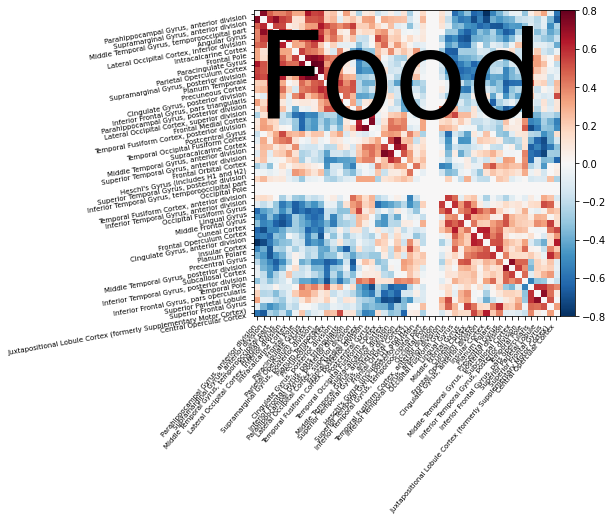

In [ ]:
# Initiate ConnectivityMeasure object with correlation as a measure
correlation_measure = ConnectivityMeasure(kind="correlation")

# Calculate correlation between timeseries
correlation_matrix = correlation_measure.fit_transform([food_series])[0]
print(correlation_matrix.shape)
# Plot the correlation matrix

# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)

# The labels we have start with the background (0), hence we skip the
# first label -> labels=labels[1:]


# matrices are ordered for block-like representation with plotting.plot_matrix
plotting.plot_matrix(correlation_matrix, labels=labels[1:],
                   vmax=0.8, vmin=-0.8, title="Food", reorder=True)



---




# Mean Conectivity Matrix

In [ ]:
#TESTING

#Mean Conectivity Matrix for all subjects
#fmri_clean = []
correlation_matrices = []
correlation_matrices_food = []
correlation_matrices_nonfood = []

food_series = np.empty((0,48))
nonfood_series = np.empty((0,48))

for i in range(len(sub_paths)):

    # Extract the time series data using NiftiMasker
    time_series = masker.fit_transform(fmri_clean[i])

    # Slicing timeseries into two conditions
    for k in range(len(events[:,2])):

        onset = round(events[k,0]/1.6)

        if events[k,2] == "food":
          food_series = np.concatenate((time_series[onset:(onset+15),:], food_series))
        elif events[k,2] == "nonfood":
          nonfood_series = np.concatenate((time_series[onset:(onset+15),:], nonfood_series))

        #food_series = np.delete(food_series, np.s_[120:], 0)
        #nonfood_series = np.delete(nonfood_series, np.s_[120:], 0)

    # Calculate correlation between timeseries
    #correlation_matrix = correlation_measure.fit_transform([time_series])[0]
    correlation_matrix_food = correlation_measure.fit_transform([food_series])[0]
    correlation_matrix_nonfood = correlation_measure.fit_transform([nonfood_series])[0]

    # Append the correlation matrix to the list
    #correlation_matrices.append(correlation_matrix)
    correlation_matrices_food.append(correlation_matrix_food)
    correlation_matrices_nonfood.append(correlation_matrix_nonfood)

# Calculate the mean of the correlation matrices
#mean_correlation_matrix = np.mean(correlation_matrices, axis=0)
mean_correlation_matrix_food = np.mean(correlation_matrices_food, axis=0)
mean_correlation_matrix_nonfood = np.mean(correlation_matrices_nonfood, axis=0)

#Diagonal
#np.fill_diagonal(mean_correlation_matrix, 0)

# Plot the mean correlation matrix
#plotting.plot_matrix(mean_correlation_matrix, labels=labels[1:],
                   #vmax=0.8, vmin=-0.8, title="Mean Correlation Matrix", reorder=True)

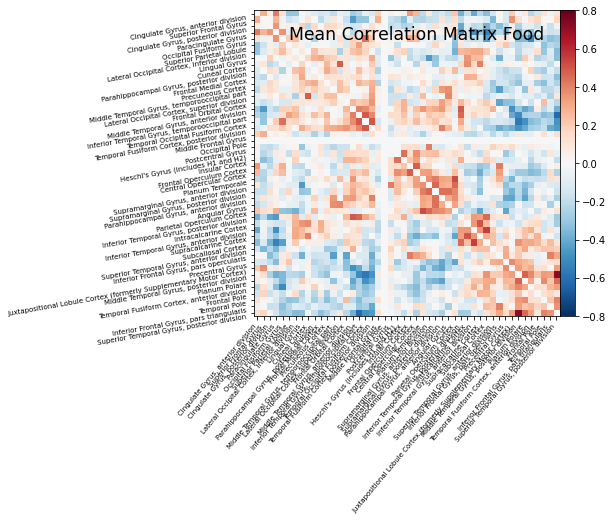

In [ ]:
np.fill_diagonal(mean_correlation_matrix_food, 0)

plotting.plot_matrix(mean_correlation_matrix_food, labels=labels[1:],
                   vmax=0.8, vmin=-0.8, title="Mean Correlation Matrix Food", reorder=True)

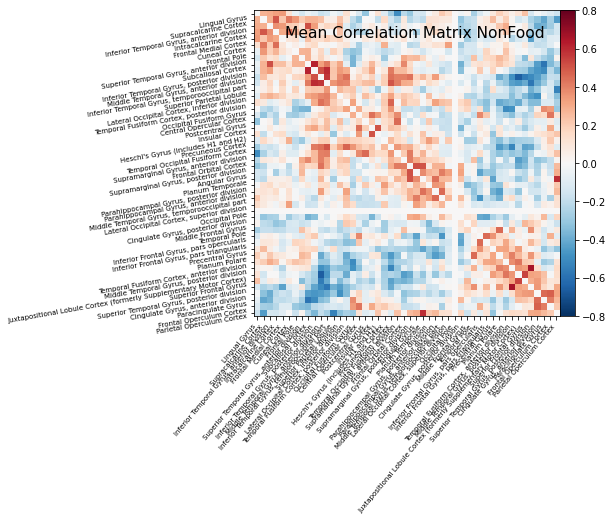

In [ ]:
np.fill_diagonal(mean_correlation_matrix_nonfood, 0)

plotting.plot_matrix(mean_correlation_matrix_nonfood, labels=labels[1:],
                   vmax=0.8, vmin=-0.8, title="Mean Correlation Matrix NonFood", reorder=True)

# Graph Measures for mean_correlation_matrix



In [ ]:
from bct.algorithms.centrality import module_degree_zscore, participation_coef_sign
from bct.algorithms.modularity import community_louvain
from bct.algorithms.clustering import clustering_coef_wu
from bct.algorithms.distance import distance_wei

**1.Clustering coefficient**

In [ ]:
#clustering_coefficient = clustering_coef_wu(mean_correlation_matrix)
clustering_coefficient_food = clustering_coef_wu(mean_correlation_matrix_food)
clustering_coefficient_nonfood = clustering_coef_wu(mean_correlation_matrix_nonfood)
#print(clustering_coefficient_food)

[0.03155474 0.02429765 0.03907693 0.01314424 0.0467157  0.04042225
 0.05803124 0.05282358 0.04104405 0.07683724 0.05892824 0.08184703
 0.04086655 0.04783155 0.04456114 0.07015622 0.01555908 0.01671681
 0.04868306 0.04637694 0.03516103 0.02447227 0.03357644 0.04086058
 0.02570989 0.0630934  0.05189826 0.04849245 0.04114429 0.03391551
 0.04786506 0.02001771 0.04211528 0.04893831 0.0239331  0.03818521
 0.06584282 0.07219568 0.0803173  0.03077421 0.03002123 0.04679648
 0.03880511 0.07368223 0.02781215 0.03350635 0.04979649 0.        ]


In [ ]:
# Calculate the mean clustering coeffiecient for the whole network
#np.mean(clustering_coefficient)
#related to number of edges and wiehgt
mean_clustering_coefficient_food = np.mean(clustering_coefficient_food)
mean_clustering_coefficient_nonfood = np.mean(clustering_coefficient_nonfood)

print(mean_clustering_coefficient_food)
print(mean_clustering_coefficient_nonfood)

**2.Shortest path length**


In [ ]:
shortest_path, _ = distance_wei(mean_correlation_matrix)
shortest_path
plotting.plot_matrix(shortest_path)

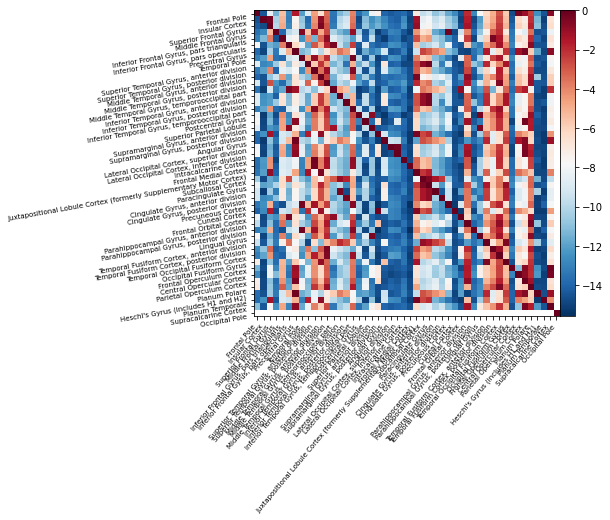

In [ ]:
shortest_path_food, _ = distance_wei(mean_correlation_matrix_food)
shortest_path_food

plotting.plot_matrix(shortest_path_food, labels=labels[1:])

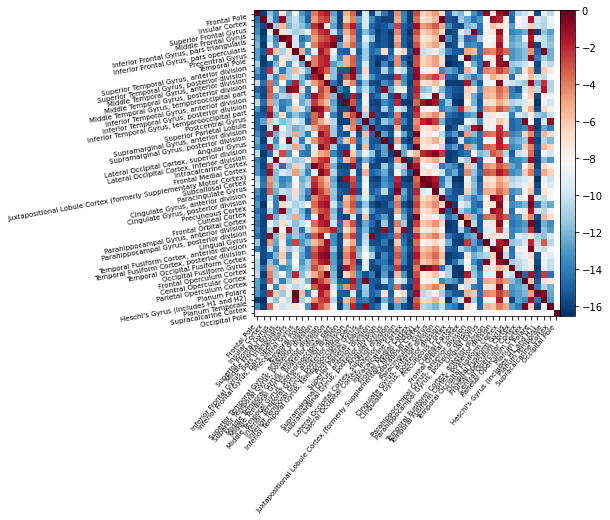

In [ ]:
shortest_path_nonfood, _ = distance_wei(mean_correlation_matrix_nonfood)
shortest_path_nonfood
plotting.plot_matrix(shortest_path_nonfood, labels=labels[1:])

In [ ]:
# Calculate the mean shortest distance (characteristic path length) for the whole network
print(np.mean(shortest_path_food))
print(np.mean(shortest_path_nonfood))

-6.712128942911983
-6.762576769633121


**3. Modularity**

*We are not sure whether the results are correct*

In [ ]:
# Calculate modularity
louvain_reps = 1000

#FOOD CONDITION
best_q_food = 0
best_m_food = 0
for _ in range(louvain_reps):
  m, q = community_louvain(mean_correlation_matrix_food, gamma=1, B="negative_asym")
  if q > best_q_food:
    best_m_food = m
    best_q_food = q

#NON-FOOD CONDITION
best_q_nonfood = 0
best_m_nonfood = 0
for _ in range(louvain_reps):
  m, q = community_louvain(mean_correlation_matrix_nonfood, gamma=1, B="negative_asym")
  if q > best_q_nonfood:
    best_m_nonfood = m
    best_q_nonfood = q

In [ ]:
# Print best Q value
print("best_q_food: ", best_q_food)
print("best_q_nonfood: ", best_q_nonfood)
# Print module labels. How many modules were identified?
print("best_m_food: ", best_m_food)
print("best_m_food: ", best_m_nonfood)


unique_food_labels = np.unique(best_m_food)
unique_nonfood_labels = np.unique(best_m_nonfood)

labels_food = [labels[i] for i in unique_food_labels]
print(labels_food)

labels_nonfood = [labels[i] for i in unique_nonfood_labels]
print(labels_nonfood)

best_q_food:  0.5069126375203958
best_q_nonfood:  0.3764333687637661
best_m_food:  [2 1 2 1 4 4 3 1 4 4 4 1 3 3 1 3 4 3 4 4 4 3 3 3 3 3 1 2 2 3 3 3 1 4 3 3 4
 3 3 3 4 4 4 1 1 4 3]
best_m_food:  [4 1 2 2 1 1 2 2 3 2 3 2 3 4 2 4 4 4 3 3 3 3 4 4 4 2 2 1 1 3 4 4 3 3 4 4 2
 4 4 4 1 1 3 2 1 3 4]
['Frontal Pole', 'Insular Cortex', 'Superior Frontal Gyrus', 'Middle Frontal Gyrus']
['Frontal Pole', 'Insular Cortex', 'Superior Frontal Gyrus', 'Middle Frontal Gyrus']


**4. Participation coefficient**

In [ ]:
z_food = module_degree_zscore(mean_correlation_matrix_food, ci=best_m_food, flag=0)
print(z_food)
z_nonfood = module_degree_zscore(mean_correlation_matrix_nonfood, ci=best_m_nonfood, flag=0)
print(z_nonfood)

[-1.36467104  0.73264818  0.67427576 -2.33860524  0.19476348 -0.01296848
 -1.1897267   0.1607711  -0.01049529  0.03200596 -1.2838367  -0.10883126
 -0.49015166 -0.66967841 -0.76239062 -0.17443965 -0.88836457 -1.31312049
  1.01908095  1.31839145 -1.57732142  0.32694422  0.79431309  0.54164963
 -0.80498252 -1.03100449  1.26989689  1.19511009 -0.50471481 -1.49158673
  0.74831974  1.59528957  0.1385603  -0.13632714 -1.28503454  1.81890716
 -1.58841977  1.09310855  0.532086    0.24232612 -0.46758912  0.62362257
  1.74395254  0.8609132   0.04703745  1.03350553  0.75678111]
[-2.57770688  0.55337469 -0.60380597 -0.79588683 -0.30048816 -1.10887469
  0.3706651  -0.41704623 -0.56460144  0.49455743 -0.70318701  1.92905925
 -0.83103078 -0.69394198 -0.72352213  0.04912876 -0.59569934 -0.45630504
  0.19173322  1.92760395  1.39154184 -0.99358957  0.63596407  1.3518738
 -0.23003487 -0.00645357 -0.62258609 -1.00511756  0.05125283 -1.2962982
  0.78530111  1.48356383 -0.7110281  -0.18363123 -0.07860743  0.

In [ ]:
# Participation coefficient
ppos_food, pneg_food = participation_coef_sign(mean_correlation_matrix_food, ci=best_m_food)
ppos_nonfood, pneg_nonfood = participation_coef_sign(mean_correlation_matrix_nonfood, ci=best_m_nonfood)

In [ ]:
# Create a pandas dataframe with brain region labels, z score, and participation coeffiecient (use pd.DataFrame)
measures_food = pd.DataFrame(list(zip(labels[1:], z_food, ppos_food, pneg_food)),
               columns =['region', 'z-score', 'pc_pos', 'pc_neg'])

In [ ]:
measures_food

In [ ]:
measures_nonfood = pd.DataFrame(list(zip(labels[1:], z_nonfood, ppos_nonfood, pneg_nonfood)),
               columns =['region', 'z-score', 'pc_pos', 'pc_neg'])

In [ ]:
measures_nonfood

# T-test for whole brain between food and nonfood conditions

The smallest *p-value* is 0.21   

In [ ]:
from scipy import stats

In [ ]:
mean_correlation_matrix_food.shape

(48, 48)

In [ ]:
ttest = stats.ttest_rel(mean_correlation_matrix_food, mean_correlation_matrix_nonfood, nan_policy="omit")

In [ ]:
ttest.pvalue

array([0.69212671, 0.90828819, 0.59347773, 0.18738814, 0.46988604,
       0.93848939, 0.84475153, 0.65811277, 0.64031294, 0.49753554,
       0.87343693, 0.84729701, 0.85523033, 0.2236961 , 0.7335634 ,
       0.66740705, 0.76904893, 0.98298228, 0.94146242, 0.63941221,
       0.52583587, 0.70710088, 0.32749789, 0.80417781, 0.18373986,
       0.73329181, 0.35312586, 0.45385292, 0.21634797, 0.94146946,
       0.58367774, 0.92943599, 0.93450715, 0.89525409, 0.32266234,
       0.96932975, 0.48159999, 0.75043163, 0.83254912, 0.34659472,
       0.31285972, 0.89513405, 0.7390862 , 0.79711116, 0.92641643,
       0.76372046, 0.80042949,        nan])

# Extracting Brain Networks



In [ ]:
from nilearn.maskers import NiftiSpheresMasker

In [ ]:
'''(−16, 4, −4) #ventral striatum left
(16, 8, −16) #right
(-10, -21, 53) #left orbitofrontal
(42, 46, 0) #lateral prefrontal cortex
(6, 14, 32) #anterior cingulate cortex

'''


seed_labels = ['Left Ventral Striatum', 'Left Orbitofrontal Cortex', 'Lateral Prefrontal Cortex', 'Anterior Cingulate Cortex']
coords = [(-16, 4, -4), (-10, -21, 53), (42, 46, 0), (6, 14, 32)]


In [ ]:
seed_masker = NiftiSpheresMasker(coords, radius=5, detrend=True,
                                 standardize=True, t_r=1.6)


## Testing for one subject

In [ ]:
seed_time_series = seed_masker.fit_transform(fmri_clean[0])

In [ ]:
seed_food_series = np.empty((0,4))
seed_nonfood_series = np.empty((0,4))

for i in range(len(events[:,2])):

  onset = round(events[i,0]/1.6)
hi
  if events[i,2] == "food":
    seed_food_series = np.concatenate((seed_time_series[onset:(onset+15),:], seed_food_series))
  elif events[i,2] == "nonfood":
    seed_nonfood_series = np.concatenate((seed_nonfood_series,seed_time_series[onset:(onset+15),:]))

#food_series = np.asarray(food_series)
print(type(seed_food_series), seed_food_series.shape)
print(type(seed_nonfood_series), seed_nonfood_series.shape)

<class 'numpy.ndarray'> (120, 4)
<class 'numpy.ndarray'> (120, 4)


(4, 4)


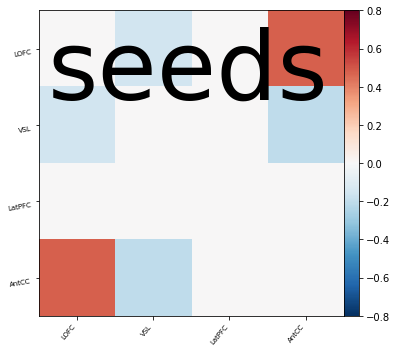

In [ ]:
# Initiate ConnectivityMeasure object with correlation as a measure
correlation_measure = ConnectivityMeasure(kind="correlation")

# Calculate correlation between timeseries
seed_correlation_matrix = correlation_measure.fit_transform([seed_food_series])[0]
print(seed_correlation_matrix.shape)
# Plot the correlation matrix

# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(seed_correlation_matrix, 0)

# The labels we have start with the background (0), hence we skip the
# first label -> labels=labels[1:]


# matrices are ordered for block-like representation with plotting.plot_matrix
plotting.plot_matrix(seed_correlation_matrix, labels=seed_labels,
                   vmax=0.8, vmin=-0.8, title="seeds", reorder=True)

(4, 4)


/usr/local/lib/python3.8/dist-packages/nilearn/plotting/matrix_plotting.py:120: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(mat, method=reorder)
/usr/local/lib/python3.8/dist-packages/nilearn/plotting/matrix_plotting.py:121: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  ordered_linkage = optimal_leaf_ordering(linkage_matrix, mat)


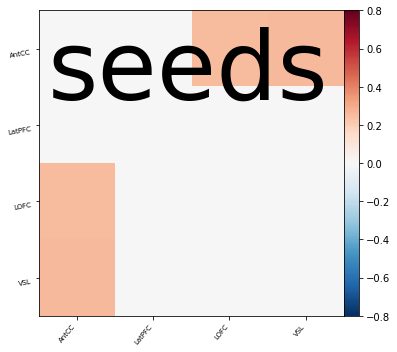

In [ ]:
# Initiate ConnectivityMeasure object with correlation as a measure
correlation_measure = ConnectivityMeasure(kind="correlation")

# Calculate correlation between timeseries
seed_correlation_matrix = correlation_measure.fit_transform([seed_nonfood_series])[0]
print(seed_correlation_matrix.shape)
# Plot the correlation matrix

# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(seed_correlation_matrix, 0)

# The labels we have start with the background (0), hence we skip the
# first label -> labels=labels[1:]


# matrices are ordered for block-like representation with plotting.plot_matrix
plotting.plot_matrix(seed_correlation_matrix, labels=seed_labels,
                   vmax=0.8, vmin=-0.8, title="seeds", reorder=True)

## Group analysis

In [ ]:
#Mean Conectivity Matrix for all subjects

seed_correlation_matrices_food = []
seed_correlation_matrices_nonfood = []

seed_food_series = np.empty((0,4))
seed_nonfood_series = np.empty((0,4))

for i in range(len(sub_paths)):

    # Extract the time series data using NiftiMasker
    seed_time_series = seed_masker.fit_transform(fmri_clean[i])

    # Slicing timeseries into two conditions
    for k in range(len(events[:,2])):

        onset = round(events[k,0]/1.6)

        if events[k,2] == "food":
          seed_food_series = np.concatenate((seed_time_series[onset:(onset+15),:], seed_food_series))
        elif events[k,2] == "nonfood":
          seed_nonfood_series = np.concatenate((seed_time_series[onset:(onset+15),:], seed_nonfood_series))

    # Calculate correlation between timeseries
    seed_correlation_matrix_food = correlation_measure.fit_transform([seed_food_series])[0]
    seed_correlation_matrix_nonfood = correlation_measure.fit_transform([seed_nonfood_series])[0]

    # Append the correlation matrix to the list
    seed_correlation_matrices_food.append(seed_correlation_matrix_food)
    seed_correlation_matrices_nonfood.append(seed_correlation_matrix_nonfood)

# Calculate the mean of the correlation matrices
seed_mean_correlation_matrix_food = np.mean(seed_correlation_matrices_food, axis=0)
seed_mean_correlation_matrix_nonfood = np.mean(seed_correlation_matrices_nonfood, axis=0)

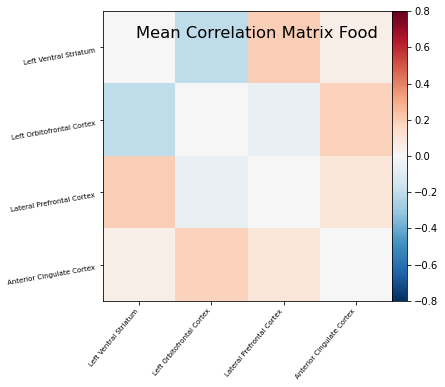

In [ ]:
np.fill_diagonal(seed_mean_correlation_matrix_food, 0)

plotting.plot_matrix(seed_mean_correlation_matrix_food, labels=seed_labels,
                   vmax=0.8, vmin=-0.8, title="Mean Correlation Matrix Food", reorder=False)

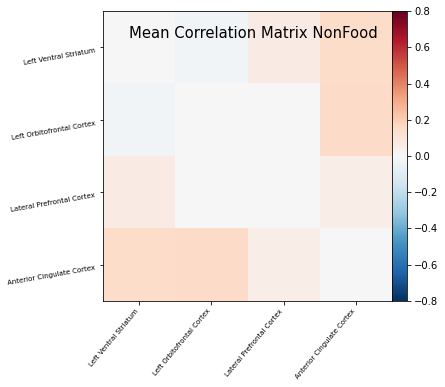

In [ ]:
np.fill_diagonal(seed_mean_correlation_matrix_nonfood, 0)

plotting.plot_matrix(seed_mean_correlation_matrix_nonfood, labels=seed_labels,
                   vmax=0.8, vmin=-0.8, title="Mean Correlation Matrix NonFood", reorder=False)

# T-test for seed regions


In [ ]:
from scipy import stats

In [ ]:
ttest = stats.ttest_rel(seed_mean_correlation_matrix_food, seed_mean_correlation_matrix_nonfood, nan_policy="omit")

In [ ]:
ttest.statistic

array([-0.55231436, -1.11495704,  0.71706896, -0.22085525])

In [ ]:
ttest.pvalue

array([0.61921708, 0.34614362, 0.5251191 , 0.83938259])